In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

In [21]:
db = pd.read_csv('AVG_UNI_COST.csv', sep=',')

In [22]:
x = db['Year'].to_numpy().reshape((-1,1))
y= db['Value'].to_numpy()
ypred = db['y_pred'].to_numpy()

In [5]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

In [6]:
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.9582052465471843
intercept: -539662.9844617092
slope: [275.4765645]


In [15]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

summation = 0
n = len(y)
for i in range (0,n):
    difference = y[i] - y_pred[i]
    squared_difference = difference **2
    summation = summation + squared_difference
MSE = summation/n
print ("Mean Squared Error: ", MSE)

predicted response:
[ 3025.84760522  3301.32416973  3576.80073423  3852.27729873
  4127.75386323  4403.23042773  4678.70699223  4954.18355673
  5229.66012123  5505.13668573  5780.61325023  6056.08981474
  6331.56637924  6607.04294374  6882.51950824  7157.99607274
  7433.47263724  7708.94920174  7984.42576624  8259.90233074
  8535.37889524  8810.85545975  9086.33202425  9361.80858875
  9637.28515325  9912.76171775 10188.23828225 10463.71484675
 10739.19141125 11014.66797575 11290.14454025 11565.62110476
 11841.09766926 12116.57423376 12392.05079826 12667.52736276
 12943.00392726 13218.48049176 13493.95705626 13769.43362076
 14044.91018526 14320.38674977 14595.86331427 14871.33987877
 15146.81644327 15422.29300777 15697.76957227 15973.24613677
 16248.72270127 16524.19926577 16799.67583027 17075.15239478]
Mean Squared Error:  745585.3041722227


In [19]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")
summation = 0
n = len(y)
for i in range (0,n):
    difference = y[i] - y_pred[i]
    squared_difference = difference **2
    summation = summation + squared_difference
MSE = summation/n
print ("Mean Squared Error: ", MSE)

predicted response:
[[ 3025.84760522]
 [ 3301.32416973]
 [ 3576.80073423]
 [ 3852.27729873]
 [ 4127.75386323]
 [ 4403.23042773]
 [ 4678.70699223]
 [ 4954.18355673]
 [ 5229.66012123]
 [ 5505.13668573]
 [ 5780.61325023]
 [ 6056.08981474]
 [ 6331.56637924]
 [ 6607.04294374]
 [ 6882.51950824]
 [ 7157.99607274]
 [ 7433.47263724]
 [ 7708.94920174]
 [ 7984.42576624]
 [ 8259.90233074]
 [ 8535.37889524]
 [ 8810.85545975]
 [ 9086.33202425]
 [ 9361.80858875]
 [ 9637.28515325]
 [ 9912.76171775]
 [10188.23828225]
 [10463.71484675]
 [10739.19141125]
 [11014.66797575]
 [11290.14454025]
 [11565.62110476]
 [11841.09766926]
 [12116.57423376]
 [12392.05079826]
 [12667.52736276]
 [12943.00392726]
 [13218.48049176]
 [13493.95705626]
 [13769.43362076]
 [14044.91018526]
 [14320.38674977]
 [14595.86331427]
 [14871.33987877]
 [15146.81644327]
 [15422.29300777]
 [15697.76957227]
 [15973.24613677]
 [16248.72270127]
 [16524.19926577]
 [16799.67583027]
 [17075.15239478]]
Mean Squared Error:  [745585.30417222]


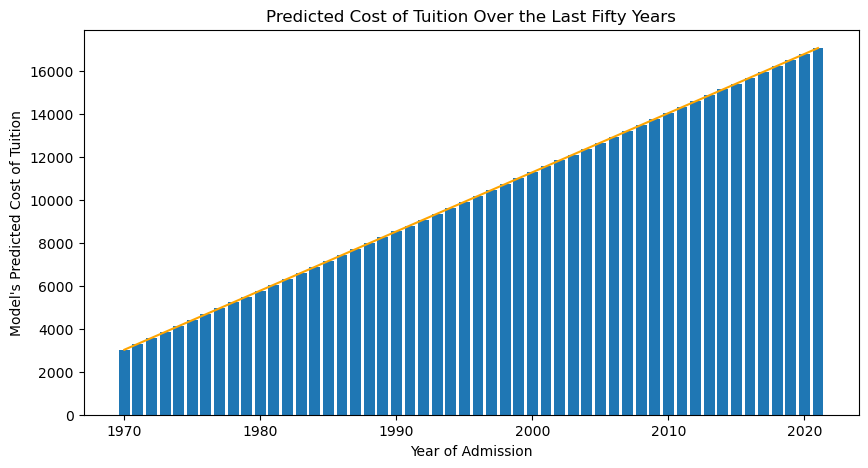

In [26]:
from sklearn.linear_model import Ridge
db = pd.read_csv('AVG_UNI_COST.csv')
y = y
lr = Ridge()
fig = plt.figure(figsize = (10, 5))
lr.fit(db[['Year']], db['y_pred'])
plt.bar(db['Year'], db['y_pred'])
plt.plot(db['Year'], lr.coef_*db['Year']+lr.intercept_, color='orange')
plt.xlabel("Year of Admission")
plt.ylabel("Model's Predicted Cost of Tuition")
plt.title("Predicted Cost of Tuition Over the Last Fifty Years")
plt.show()